# **L'analyse économétrique des réseaux bipartis**

### **Sommaire:**

**I - Introduction**

**II - Création du graphe**

&nbsp;&nbsp;&nbsp;&nbsp;*A) Les réseaux Bipartis*

&nbsp;&nbsp;&nbsp;&nbsp;*B) Application aux interactions entre les médecins et les patients*

**III - Modèle AKM**

&nbsp;&nbsp;&nbsp;&nbsp;*A) Principe de l'estimation*

&nbsp;&nbsp;&nbsp;&nbsp;*B) Performances du modèle*

&nbsp;&nbsp;&nbsp;&nbsp;*C) Effet de la sparcité sur la qualité de l'estimation*

**IV - Co-clustering**

&nbsp;&nbsp;&nbsp;&nbsp;*A) Méthode d'estimation*

&nbsp;&nbsp;&nbsp;&nbsp;*B) Application et Résultats*

&nbsp;&nbsp;&nbsp;&nbsp;*C) Groupes et effets propres*

**V - Conclusion**

### **I - Introduction**

Dans les réseaux bipartis, on considère deux types d'agents. Chaque agent peut interagir avec un ou plusieurs agents de l'autre type, mais jamais du sien. Ces structures bipartites sont présentes dans de nombreux domaines de l'économie, comme dans la relation travailleur - entreprise ou encore patient - médecin. Dans les réseaux bipartis, les deux types d'agents peuvent avoir des effets propres inobservés, le talent du travailleur et l'image de l'entreprise par exemple, on parle alors d'hétérogénéité inobservé bilatérale. 

Un grand enjeu des réseaux bipartis est alors de parvenir à identifier et à estimer ces effets propres.
Dans le cadre du séminaire de modélisation statistique et de la conférence de Mr. Lecué, nous nous intéresserons en particulier à la relation entre médecins et patients. 

Afin de modéliser ces réseaux et de parvenir à identifier ces hétérogénéités bilatérales, nous nous appuyons sur l'article "Econometric Analysis of Bipartite Networks" de Stéphane Bonhomme. 
Dans cet article Bonhomme mène une revue des différentes technique et méthodes économétriques utilisées pour analyser les graphes bipartis. Nous nous intéressons en particulier à deux de ces méthodes: 

- 1\) L'estimateur AKM (pages 7 à 10) et 
    
- 2\) L'identification en deux étapes grâce au co-clustering (pages 30 à 33).


### **II - Création du Graphe**

#### *A) Les réseaux Bipartis*

Un graphe biparti est un un graphe où l'ensemble des sommets V est séparé en deux sous-ensembles V1 et V2 tel que toutes les arrêtes de l'ensemble des arrêtes E relient un point de V1 à un point de V2. Il ne peut donc pas avoir d'arrête entre deux points de V1 ou deux points de V2. 

Un réseau biparti est un graphe biparti (V1,V2,E) où les sommets et les arrêtes du graphe sont associés à des variables aléatoires. Soit i in élément de V1 et j un élément de V2, on introduit des variables aléatoires $D_{ijt}$ qui valent 1 si i et j sont reliés au moins t fois et 0 sinon. Le "t" est introduit pour prendre en compte plusieurs liens entre i et j, en fonction du problème étudié si un seul lien peut exister entre un point de V1 et un point de V2 il peut être omis. On introduit ensuite des variables $Y_{ijt}$ qui correspondent à un résultat d'un appariement entre i et j pour le lien t. $Y_{ijt}$ n'est observé que si $D_{ijt}$ = 1.
Pour prendre un exemple concret, V1 peut correspondre aux travailleurs, et V2 aux entreprises, si un travailleur i de V1 travaille dans une entreprise j de V2 alors $D_{ij}$ = 1. On peut alors prendre $Y_{ij}$ le salaire de i lorsqu'il travaille dans l'entreprise j. Ce salaire n'est observé que si i travaille réellement chez j et donc si $D_{ij}$ = 1.

De plus, $Y_{ijt}$ dépend d'une variable $X_{ijt}$ qui correspond à des caractéristiques observées de la relation t entre i,j, de deux variables inobservées $\alpha_{i}$ et $\psi_{j}$ qui correspondent à des caractéristiques propres à i et à j ainsi que de $\epsilon_{ijt}$ correspondant aux caractéristiques inobservées de la relation t entre i,j.
La présence de $\alpha_{i}$ et $\psi_{j}$ correspond à ce que nous appelions dans l'introduction l'hétérogénéité inobservé bilatérale.

Nous ferons par la suite, et donc pour les deux modèles présentés, l'hypothèse que le réseau est exogène c'est à dire :
 $ \forall i \in V_1, \forall j \in V_2  $  $D_{ijt} \perp \epsilon_{ijt} \mid (X_{ijt}, \alpha_{i}, \epsilon_{j})$.
On fera aussi l'hypothèse suivante :
 $Y_{ijt} \perp Y_{i'j't} \mid X, \alpha, \psi, D \quad \text{pour tout } (i, j) \ne (i', j')$ 

 Pour un modèle linéaire, le modèle sera donc le suivant :
 $ \forall i \in V_1, \forall j \in V_2  $  
 $Y^*_{ijt} = X'_{ijt} \beta + \alpha_i + \psi_j + \epsilon_{ijt}$ 
 
 $Y_{ijt} = D_{ijt} \cdot Y^*_{ijt}$

 Avec l'hypothèse que : $\mathbb{E}[\epsilon_{ijt} \mid D, X, \alpha, \psi] = 0$


#### *B) Application aux interactions entre les médecins et les patients*

Nous allons maintenant appliquer cette théorie des réseaux bipartis à notre problème d'interaction entre les médecins et les patients.

On commence par créer une instance de notre graphe bipartite. 

On ne s'intéresse ici pas à l'évolution dans le temps et on se positionne à un temps $t$ fixé qu'on ne mentionne donc pas. On se place dans un contexte médicale avec un certains nombres de patients i et de docteurs j. Dans notre problème, nous prenons $X_{ij}$ comme étant la distance entre le patient i et le medecin j. 

Leurs positions respectives sont générées aléatoirement sur [0;1]x[0;1] et on calcule les distances $X_{ij}$ = $distance_{ij}$.

Nous avons codé l'ensemble des méthodes et des fonctions que nous utilisons grâce à l'objet graph_AKM défini dans le fichier fonctionsAKM.py

In [1]:
import numpy as np
import bipartitesolver

On fixe le nombre de patients et le nombre de docteurs.

In [2]:
nombre_patient=100
nombre_docteur=30

On crée le graphe.

In [3]:
akm = bipartitesolver.solver(nombre_patient, nombre_docteur)

On génère ensuite des effets fixes pour les médecins et les docteurs.
L'effet fixe du patient peut correspondre à son état de santé global et celui du docteur, sa renomée

In [4]:
effetpat = -np.random.randint(0,3,size=akm.nombre_patient)/10
effetdoc = np.random.randint(0,3,size=akm.nombre_docteur)/10
beta_lien = -2

On génère ensuite la matrice des liens (qui correspond à la matrice $D_{ij}$ présenté dans le modèle théorique) selon le modèle suivant:

$D_{ij}$ suit un loi de Bernouilli de paramètre $\frac{e^{\lambda_{ij}}}{1+e^{\lambda_{ij}}}$ où:

 $\lambda_{ij}=  \beta_{lien} * distance_{ij} + effetpat_{i} + effetdoc_{j} $

/home/onyxia/work/Bipartite-Networks/bipartitesolver.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([self.position_docteur[0][j], self.position_patient[0][i]], [self.position_docteur[1][j], self.position_patient[1][i]], 'k-',alpha=0.5,color="green")


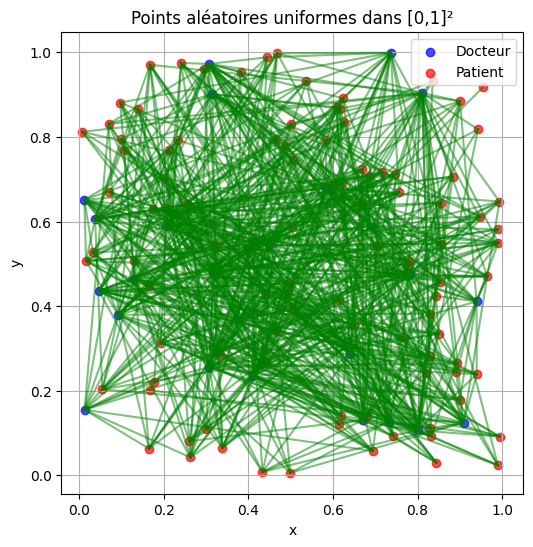

In [5]:
akm.create_link(effetpat, effetdoc, beta_lien, show=True)

In [6]:
print("sparcity = ", int(akm.lien.sum())/(akm.nombre_docteur*akm.nombre_patient))

sparcity =  0.27066666666666667


La sparcité du graphe peut être modifiée en jouant sur les paramètres et notamment sur $\beta_{lien}$.

###  **III - Modèle AKM**

#### *A) Principe de l'estimation*

D'après le modèle des réseaux bipartis présenté dans le II-A nous avons :
$$
\mathbb{E}\left[Y^{*}_{ijt} \mid D, X, \alpha, \psi \right] = X'_{ijt} \beta + \alpha_i + \psi_j
$$

En notant N le nombre d'éléments dans V1 et J le nombre d'éléments dans V2 (ce qui correspondra respectivement dans notre problème au nombre de patients et au nombre de docteurs), on note  $\widetilde{X}$ la matrice de taille NJT qui stocke les $X'_{ijt}$ on note aussi $\widetilde{A}$  et $\widetilde{B}$ les matrices de tailles respectives NJT x N et NJT x J formés en empilant respectivement les indicateurs de i et j. 

Pour mieux comprendre les matrices $\widetilde{A}$  et $\widetilde{B}$ voici un exemple pour N = 3, J = 3 et T = 1:
$$
\begin{aligned}
\widetilde{A} &= \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 1 \\
0 & 0 & 1
\end{bmatrix} \quad
\widetilde{B} &= \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{aligned}
$$

Finalement,on note Y* la matrice de taille NJT x 1 qui contient les $Y*_{ijt}$.
 
On a alors :

$$
\mathbb{E}\left(Y^* \mid D, X, \alpha, \psi \right) = \widetilde{X} \beta + \widetilde{A} \alpha + \widetilde{B} \psi
$$

De plus en posant $L = \sum_{i,j,t} D_{ijt}$, on pose S la matrice de taille L x NJT la matrice qui selectionne les éléments Y* qui ont un lien, c'est à dire la matrice telle que Y = SY*. En posant $X = S\widetilde{X}$,  $A = S\widetilde{A}$ et $B = S\widetilde{B}$ on a alors :

$$
E(Y \mid D, X, \alpha, \psi) = X\beta + A\alpha + B\psi
$$

On va pouvoir maintenant déterminer des estimateurs consistants de $\beta$, $\alpha$ et $\psi$.

Posons $ G = [A \quad B] $, et $C = I - GG^\dagger$ où $G^\dagger$ est la pseudo-inverse de Moore-Penrose,  C est alors une matrice de projection et vérifie :

$$
E(C(Y - X\beta) \mid D, X) = 0
$$

On peut alors estimer $\beta$ de la manière suivante : 
$$
\hat{\beta} = (X^\top C X)^{-1} X^\top C Y
$$

Puis on peut estimer $\alpha$ et $\psi$ de la manière suivante en fixant un $\psi_{j} = 0$:

$$
\begin{bmatrix}
\hat{\alpha} \\
\hat{\psi}
\end{bmatrix}
=
(G^\top G)^{-1} G^\top (Y - X\hat{\beta})
$$

Les trois estimateurs sont consistants.

#### *B) Performances du modèle*

Nous allons maintenant appliquer le modèle AKM à notre problème d'interactions entre les patients et les médecins. 

On commence par générer un prix de consultation potentiel $Y^*$ selon le modèle suivant:

Pour des effets fixes:

$\alpha_{i}$ pour le patient $i$ et $\psi_{j}$ pour le docteur $j$. $\alpha_{i}$ pourra correspondre à l'état de santé du patient i, tandis que $\psi_{j}$ pour correspondre à la qualité du médecin dans son travail.

On a :

$Y^*_{ij} = constente + \alpha_{i} + \psi_{j} + \beta*distance_{ij} + \epsilon_{ij} \quad$  où $\epsilon_{ij} \sim_{iid} \mathcal{N}(0,v)$

On considère ensuite $Y=D \times Y^*$, le prix observé, et on résout avec AKM.

Pour résoudre AKM, on commence par définir les effets fixes:

In [7]:
alpha_sante = -np.random.randint(0,3,size=akm.nombre_patient)/1
psi_sante = np.random.randint(0,3,size=akm.nombre_docteur)/1
psi_sante[len(psi_sante)-1]=0 #identification

print("effet fixe patient:", alpha_sante)
print("")
print("effet fixe docteur:", psi_sante)

effet fixe patient: [ 0.  0.  0. -2. -1.  0.  0.  0. -1. -2.  0.  0. -1.  0. -1. -1.  0. -2.
 -2. -1. -2.  0. -2.  0. -2. -2. -2. -1. -2. -2. -2. -1. -2. -1. -2. -2.
  0. -2.  0. -1. -2.  0. -2.  0.  0.  0.  0. -2.  0. -2. -2. -2. -2. -2.
 -1. -1. -2. -2. -2. -1. -1.  0.  0.  0. -2. -1. -1.  0. -1. -1. -2.  0.
  0. -2.  0. -1. -1.  0. -1. -2. -1.  0.  0.  0.  0. -1.  0. -1. -2.  0.
 -1. -2.  0.  0.  0. -2. -1. -1. -1.  0.]

effet fixe docteur: [2. 2. 2. 1. 2. 1. 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 2. 1. 0. 0. 2. 0. 0. 2.
 2. 0. 2. 1. 0. 0.]


On applique ensuite les formules d'AKM:

In [8]:
estimation = akm.akm_solver(alpha_sante, psi_sante, constente=0, beta=1)

print(f"""
la constante estimée est: {estimation[0][0]}, au lieu de: {akm.constente}
le beta estimée est: {estimation[0][1]}, au lieu de: {akm.beta}
les α estimés sont: {estimation[1][:3]}..., au lieu de: {akm.alpha[:3]}...
les ψ estimés sont: {estimation[2][:3]}..., au lieu de: {akm.psi[:3]}...
""")

akm.model_recap()



la constante estimée est: [-0.19070612], au lieu de: 0
le beta estimée est: [1.31630035], au lieu de: 1
les α estimés sont: [ 0.08657044  0.14219977 -0.40687846]..., au lieu de: [0. 0. 0.]...
les ψ estimés sont: [1.9261906  2.09849665 2.17793617]..., au lieu de: [2. 2. 2.]...

 Les liens sont créés selon le modèle: Dij ~ B (1-1/(1+exp(λij))) 
                où λ_ij = -2*Xij + effet_pati + effet_docj
                avec effet_pat dans [-0.2;0.0]
                avec effet_doc dans [0.0;0.2]
                
 Les prix sont créés selon le modèle: Yij = 0 + 1*Xij + αi + ψj + εij
                où εij ~ N(0,1)
                avec α dans [-2.0;0.0]
                avec ψ dans [0.0;2.0]
                


En faisant varier les valeurs des $\alpha_i$ on remarque que le modèle n'est pas identifiable et en particulier qu'il n'identifie en général pas entre les $\alpha_i$ et la constante. Cela peut poser problème au niveau du MSE $\alpha_i$, mais pas pour le MSE du modèle entier.

On peut ensuite mesurer la performance du modèle et en particulier les MSE:

Le meileur MSE du prix vaut la variance du Bruit. En effet supposons un estimateur qui identifierait parfaitement les coefficients du modèle, on aurait:

$\frac{1}{n} \sum_{k=1}^n (Y_k-\hat{Y_k})^2 = \frac{1}{n} \sum_{i=1}^n \epsilon_k^2 = V(\epsilon)$

In [9]:
a = akm.akm_show_perf() 

Le mse_prix vaut: 1.1683333333333332, il doit normalement valoir la variance du bruit = 1
Le mse_alpha vaut: 0.19723497281073857
Le mse_psi vaut: 0.06202273749170253


#### *C) Effet de la sparcité sur la qualité de l'estimation*

On veut voir comment évolue la qualité de l'estimation des effets fixes avec la densité du graph. 

Pour cela on fixe un modèle pour les prix mais on change les paramètres du modèle de création des liens. 

Ci-dessous on vait varier $\beta_{lien}$ entre -5 et 0.

100%|██████████| 10/10 [00:33<00:00,  3.36s/it]


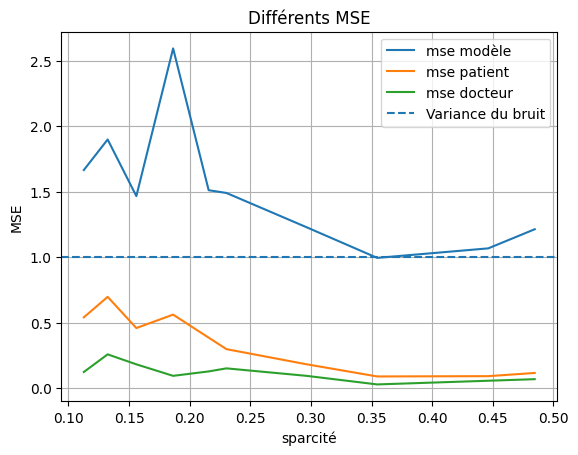

In [10]:
if True:
    akm.akm_sparcity_effect(-5,0,10)

On voit clairement que plus il y a de liens dans notre graph, mieux le modèle identifie nos coefficients et plus les prédictions sont proches de la réalité.

### **IV - Co-clustering**

#### *A) Principe de l'estimation*

On reprend les mêmes notations et le même modèle que précédemment.

L'objectif principal de cette méthode est d'identifier $\beta_{lien}$ et $\beta$ en deux étapes:
- La première étape identifie grâce au clustering différents groupes de patients et de docteurs en fonction de leur nombre de liens. 
- La deuxième étape effectue des régressions de nos variables d'intérêts sur no co-variables et sur les différents clusters de patients et de docteurs.

**Étape 1:**

Pour chaque patient $i$, on calcule ses moments pondérés $M_{1,i}$ et $M_{2,i}$ où:

$M_{1,i} = \sum_{j=1} ^J D_{ij}$

$M_{2,i} = \sum_{j=1} ^J D_{ij}Y_{ij}$

On clusterise ensuite avec k-means nos patients selon la statistique: $ \frac{M_{1,i}}{\sigma_{1,i}} + \frac{M_{2,i}}{\sigma_{2,i}}$

où $\sigma_{1,i}$ est l'écrat-type de $D_i$ et $\sigma_{2,i}$ est l'ecart-type de $(D*Y)_i$

(l' article reste vague sur comment pondérer ces deux moments, nous l'avons donc interprété comme précédemment)

On obtient alors un ensemble de clusters de patients $(CP_k)_{1<k<K}$

On reprend exactement les mêmes étapes pour les docteurs $j$, pour obtenir les clusters $(CD_l)_{1<l<L}$

**Étape 2:**

On effectue deux régressions pour obtenir les coefficients $\beta_{lien}$ et $\beta$ de $X$

- Une régression probit ou logit de $D \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$  qui permet d'obtenir $\beta_{lien}$
- Une régression MCO de $Y \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ qui permet d'obtenir $\beta$

La deuxième régression se faisant bien entendu sur les observations uniquement.
#### *B) Application et Résultats*

L'article de Bonhomme utilise comme exemple un modèle où:

- $D$ suit un modèle probit 
- $I=J$
- $\alpha_i = \gamma effetpatient_i$ et  $\psi_i = \gamma effetdocteur_i$

Autrement dit, les effets propres des docteurs et des patients sont proportionnels dans les deux modèles.

Dans notre cas, $D$ suit un logit. Nous créons un modèle avec les deux dernières conditions.

In [11]:
nombre_docteur_cc=100
nombre_patient_cc=100

cc=bipartitesolver.solver(nombre_patient_cc,nombre_docteur_cc)

#création lien
cc.effet_pat = -np.random.randint(0,30,size=nombre_patient_cc)/10
cc.effet_doc = np.random.randint(0,30,size=nombre_docteur_cc)/10
cc.beta_lien = -2

#création prix
cc.alpha = cc.effet_pat/10
cc.psi = cc.effet_doc/10
cc.constente = 1
cc.beta = 3
cc.std_bruit = 1

cc.model_recap()

 Les liens sont créés selon le modèle: Dij ~ B (1-1/(1+exp(λij))) 
                où λ_ij = -2*Xij + effet_pati + effet_docj
                avec effet_pat dans [-2.9;0.0]
                avec effet_doc dans [0.0;2.9]
                
 Les prix sont créés selon le modèle: Yij = 1 + 3*Xij + αi + ψj + εij
                où εij ~ N(0,1)
                avec α dans [-0.29;0.0]
                avec ψ dans [0.0;0.29]
                


On crée notre graph

In [12]:
cc.create_link(show=False )
print("sparcité = ", int(cc.lien.sum())/(cc.nombre_docteur*cc.nombre_patient))

sparcité =  0.3371


On définit notre nombre de clusters

In [13]:
nombre_cluster_cc = 10

On fait la régression.

In [14]:
modèle_cc=cc.coclustering_solver(nombre_cluster=nombre_cluster_cc, print_reg=False ,print_corr=False)

la valeur de beta lien estimée est :-1.8174724010213532, elle est en réalité de -2
la valeur de beta estimée est :3.1012066243032876, elle est en réalité de 3


Plus précisément la régression logit $D \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ donne:

In [15]:
print(modèle_cc[0].summary())

                           Logit Regression Results                           
Dep. Variable:                   link   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Thu, 22 May 2025   Pseudo R-squ.:                  0.2029
Time:                        08:51:38   Log-Likelihood:                -5094.3
converged:                       True   LL-Null:                       -6390.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3560      0.241      1.475      0.140      -0.117       0.829
distance              -1.8175      0.108    -16.873      0.000      -2.029      -1.606
cluster_patients_0  

Et la régresion MCO de $Y \sim (1, X, (1_{CP_k})_{1<k<K-1}, (1_{CD_l})_{1<l<L-1})$ donne:

In [16]:
print(modèle_cc[1].summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     93.86
Date:                Thu, 22 May 2025   Prob (F-statistic):          9.21e-293
Time:                        08:51:38   Log-Likelihood:                -4766.7
No. Observations:                3371   AIC:                             9573.
Df Residuals:                    3351   BIC:                             9696.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0710      0

#### *C) Groupes et effets propres*

On voit qu'à priori, les coefficients des clusters de nos régressions ne correspondent pas tout à fait avec les vrais effets fixes. 

Cependant, nous pouvons essayer de voir si les clusters sont cohérents.

Pour cela nous étudions deux corrélations. 

- Celle entre les effets fixes, $\alpha_i$ et le coefficient estimé du cluster dans lequel se trouve $i$, $\hat{\alpha}_{CP(i)}$, resp pour les docteurs j

- Celle entre les effets fixes, $\alpha_i$ et la moyenne des effets fixes du cluster contenant $i$, $\bar{\alpha}(CP(i))$, resp pour les docteurs j


la valeur de beta lien estimée est :-1.8174724010213532, elle est en réalité de -2
la valeur de beta estimée est :3.1012066243032876, elle est en réalité de 3
Corélation des effets fixes des docteurs avec ceux estimés par la régression sur les clusters 0.771576203781399
Corélation des effets fixes des patients avec ceux estimés par la régression sur les clusters 0.8460745979045703
Corrélation des effets fixes des docteurs avec la moyenne du groupe estimé 0.954873686873854
Corrélation des effets fixes des patients avec la moyenne du groupe estimé 0.9528440493944671


/home/onyxia/work/Bipartite-Networks/bipartitesolver.py:408: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


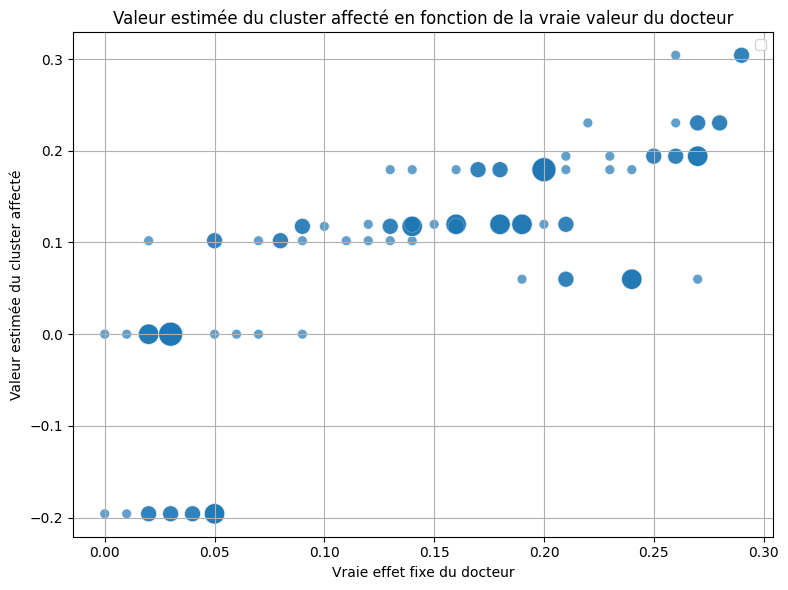

/home/onyxia/work/Bipartite-Networks/bipartitesolver.py:432: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


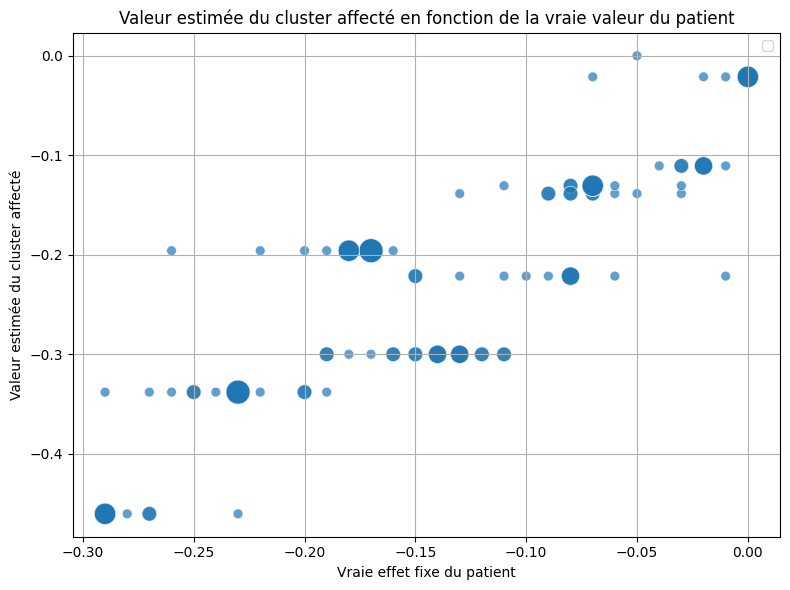

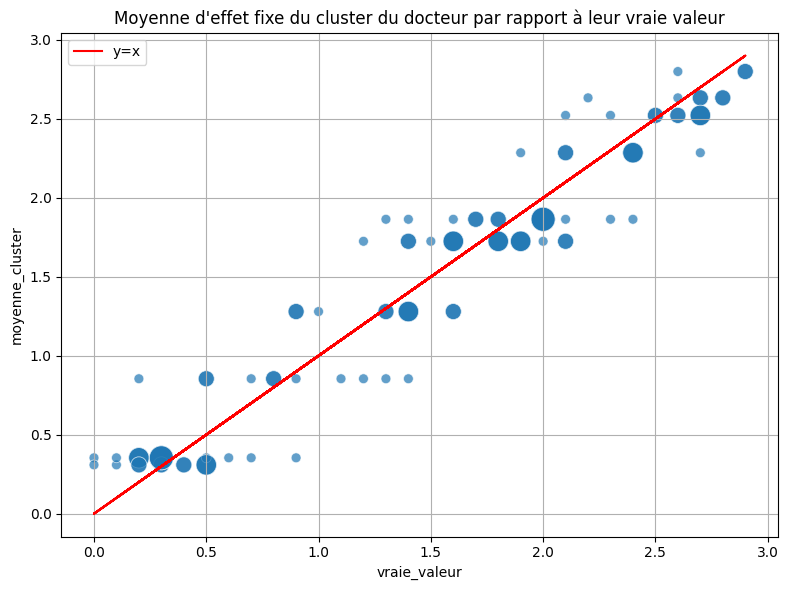

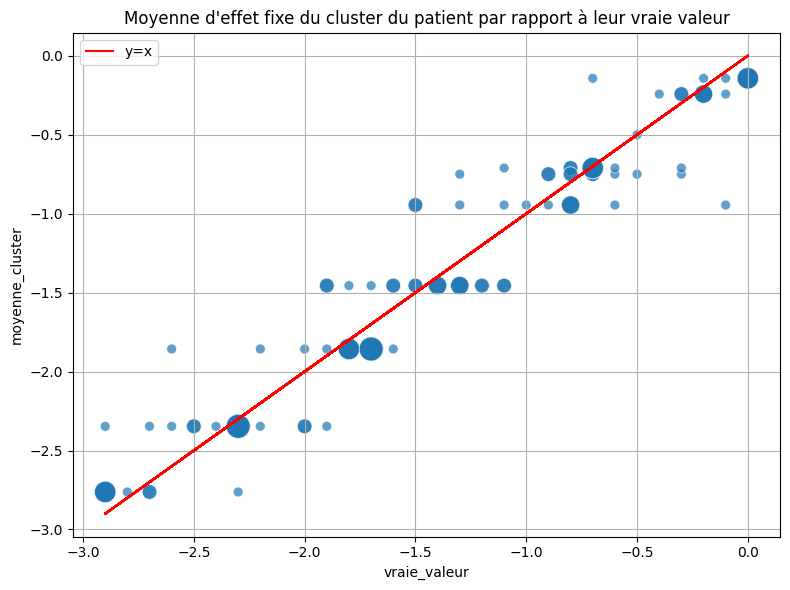

In [17]:
_=cc.coclustering_solver(nombre_cluster=nombre_cluster_cc, print_reg=False ,print_corr=True)

Relancer le modèle plusieurs fois permet de voir que l'on a des corrélations qui peuvent être assez variables.

Mais on constate globalement que nos clusters sont bien voire très bien corrélés à nos vrais effets fixes.

### **V - Conclusion**

Bien que notre modèle soit plutôt simple avec une seule co-variable, il illustre bien la puissance et l'efficacité des deux méthodes pour estimer les paramètres d'un modèle:

- Avec AKM nous sommes capables de très bien identifier les paramètres et les effets fixes intervenant dans la formation de la variable d'intérêt.
- Avec le co-clustering, nous parvenons à retrouver un modèle de formation des liens et arrivons à regrouper les agents entre ceux qui ont des effets propres proches. 

Dans ce projet nous avons uniquement exploré des modèles linéaires, mais dans son papier Bonhomme fait également la revue de diverses méthodes d'estimation pour les modèles non-linéaires de réseaux bipartis. L'aspect temporel de ces réseaux et leur évolution au cours du temps est également un aspect très intéressant que nous n'avons malheureusement pas eu le temps d'aborder et qui trouve de nombreuses applications économiques. 